# Ford GoBike Exploration
## by Jonathan Obise

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> [Bay Wheels (Formerly Ford GoBike)](https://en.wikipedia.org/wiki/Bay_Wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.


In [301]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [302]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [303]:
df.shape

(183412, 16)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [305]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [306]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [307]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [308]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [309]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [310]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [311]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [312]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [313]:
df.size

2934592

In [314]:
df_new = df[df.member_gender.isnull() == False]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [315]:
df_new.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [316]:
df_new = df_new[df_new.start_station_id.isnull() == False]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [317]:
df_new.duplicated().sum()

0

In [318]:
#Convert the columns to the datetime
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

In [319]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [320]:
# We can now extract the dayofweek and hours information from the start_time
df_new['start_time_dayofweek']= df_new['start_time'].dt.strftime('%a')
df_new['start_time_hour']= df_new['start_time'].dt.hour

In [321]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thu,23


In [322]:
df_new.start_time_dayofweek.value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_dayofweek, dtype: int64

In [323]:
# This converts the start_time_dayofweek to ordinal variables.
week_days = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_week_days = pd.api.types.CategoricalDtype(ordered = True, categories = week_days)
df_new['start_time_dayofweek'] = df_new['start_time_dayofweek'].astype(ordered_week_days)

In [324]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [325]:
# Compute member_age from member_birth_year.
df_new['member_age'] = 2021 - df_new['member_birth_year']
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thu,23,62.0


In [326]:
df_new['member_age'] = df_new['member_age'].astype(int)
df_new['member_birth_year'] = df_new['member_birth_year'].astype(int)

In [327]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,62


### What is the structure of your dataset?

> Teh dataset contains information about: 
> + Duration in sec of bike rides
> + The start and end time of the rides in the year 2019
> + The start station id
> + The longitude and latitude of the start and end station
> + The bike id, user type, year of birth, gender information amomg others


### What is/are the main feature(s) of interest in your dataset?

> I would argue that one of teh main feature of the dataset is the duration it takes a bike to go feom start station to end station.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end time of the rides, start and end station id, and member age.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [328]:
df_new['duration_min'] = df_new['duration_sec']/60

In [329]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,37,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,62,29.883333


In [330]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

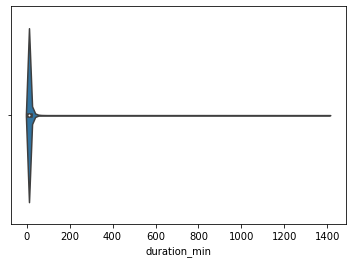

In [331]:
sb.violinplot(data = df_new, x = 'duration_min');

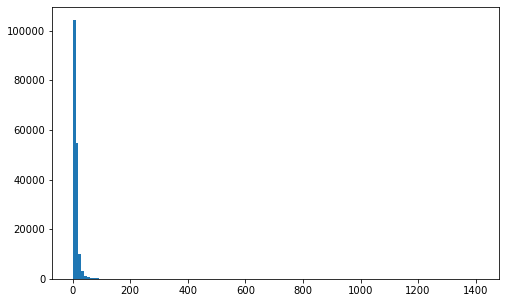

In [332]:
binsize = 10
bins = np.arange(0, df_new['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df_new, x = 'duration_min', bins=bins);

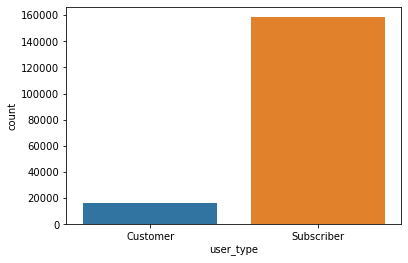

In [333]:
sb.countplot(data = df_new, x = 'user_type');

> **The number of subscribers is way more than customers**.

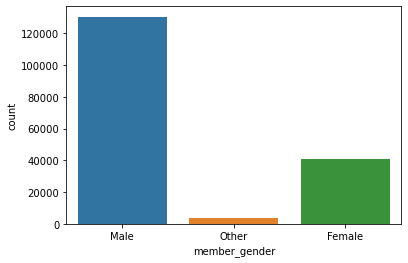

In [334]:
sb.countplot(data = df_new, x = 'member_gender');

> **Male Bikers are 3 time more than Female Bikers**

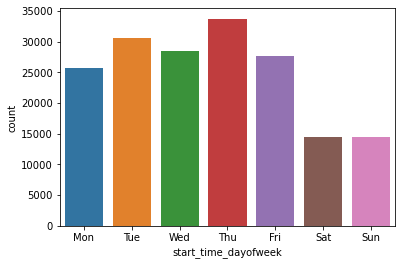

In [335]:
sb.countplot(data = df_new, x = 'start_time_dayofweek');

> **Thursdays seem to be the day with the most biking activity. This is followed by Tuesday and then Wednesday.**

<AxesSubplot:xlabel='start_time_hour', ylabel='count'>

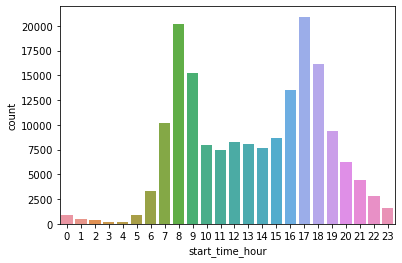

In [336]:
sb.countplot(data = df_new, x = 'start_time_hour')

> **There is a peak by 8am and 5pm**

In [337]:
df_new.member_age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

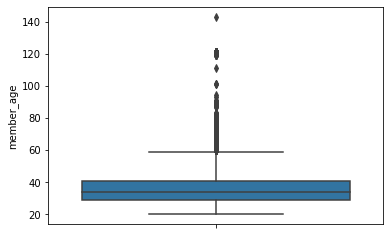

In [338]:
sb.boxplot(data = df_new, y = 'member_age');

> **There is an outlier age at about 143. If we use ages below 60, we would get a more reasonable distribution of the member ages.**

In [339]:
df_new = df_new[df_new.member_age <= 60]

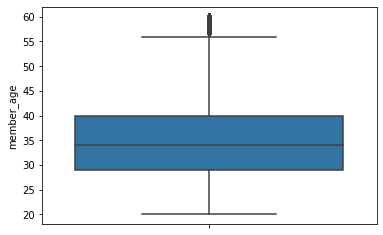

In [340]:
sb.boxplot(data = df_new, y = 'member_age');

>**This represents the data better than the previous boxplot.**

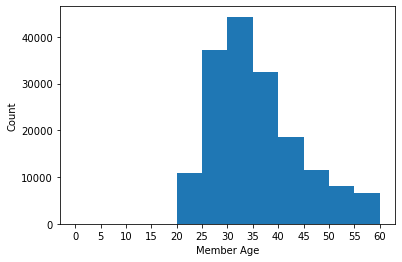

In [341]:
bins = np.arange(0, df_new['member_age'].max()+5, 5)
plt.hist(data=df_new, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

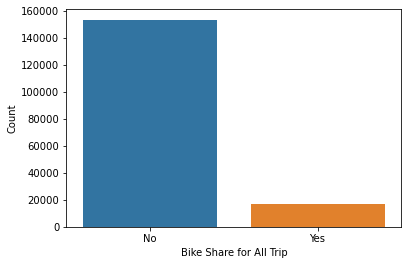

In [342]:
sb.countplot(data=df_new, x='bike_share_for_all_trip');
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

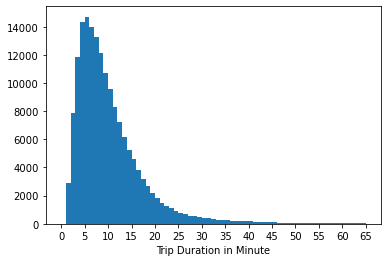

In [343]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_new, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

In [344]:
df_new = df_new.query('duration_min <= 66')
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168802 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             168802 non-null  int64         
 1   start_time               168802 non-null  datetime64[ns]
 2   end_time                 168802 non-null  datetime64[ns]
 3   start_station_id         168802 non-null  float64       
 4   start_station_name       168802 non-null  object        
 5   start_station_latitude   168802 non-null  float64       
 6   start_station_longitude  168802 non-null  float64       
 7   end_station_id           168802 non-null  float64       
 8   end_station_name         168802 non-null  object        
 9   end_station_latitude     168802 non-null  float64       
 10  end_station_longitude    168802 non-null  float64       
 11  bike_id                  168802 non-null  int64         
 12  user_type       

In [345]:
df_new.to_csv('clean_data.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> + From our analysis, we see that the number of trips peaked at around 8am in the morning and 5pm in the evening. In addition to the fact that Tuesdays and Thursdays saw the highest number of activity.
> + There are also more male riders than female riders as seen in our dataset.
> + The variable **member_age** had an unusual outlier at around 143. To better analyse our date, this was removed in addition to ages above 60.
> + It does appear most of the trip fell between 5 and 15 mins way below the 60 mins mark. Going by this, I would be remove the outlier long trip cases so as to focus on the common cases.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created new variables were created such as start_time_dayoftheweek, start_time_hour and the duration in minutes to help with performing additional analysis on the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

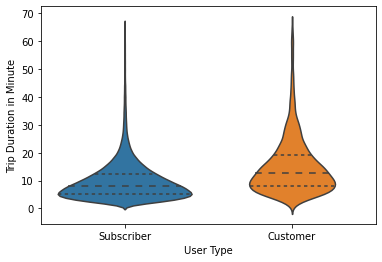

In [346]:
# Plot a violin plot to investigate how the trip duration distribution between customers and subscribers
sb.violinplot(data=df_new, x='user_type', y='duration_min', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

> It does appear like subscribers have shorter trips and a more specific usage or targeted goal riding the bikes compared to customers who vary more and seem to generally rent the bikes for longer periods of time.

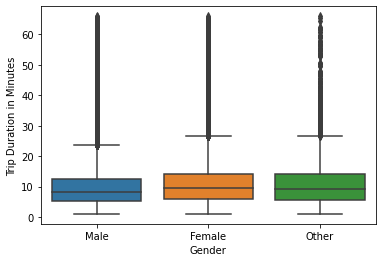

In [347]:
# Find out the duration and distribution of trips by gender
sb.boxplot(data=df_new, x='member_gender', y='duration_min');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minutes');

> Not so much in terms of the disparities but we see members fo the female gender tend to take longer rides as compared to the male gender. This is also indicated by the higher median and IQR for the female gender.

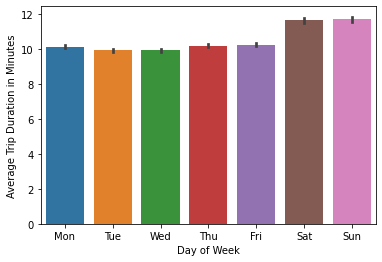

In [348]:
# Visualize the average trip duration on weekdays
sb.barplot(data=df_new, x='start_time_dayofweek', y='duration_min');
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minutes');

> As expected, Saturdays and Sundays were days that registered the longest trips. This is not surprising since it is weekend and most people don't work on these days.

In [349]:
df_new.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_time_dayofweek', 'start_time_hour', 'member_age',
       'duration_min'],
      dtype='object')

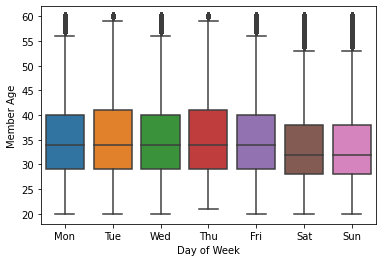

In [350]:
# Visualize the average trip duration per month
sb.boxplot(data=df_new, x='start_time_dayofweek', y='member_age');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

> Weekday riders appear to be slightly older than weekend riders. This may not be farfetched as most who commute to work as observed on the preceeding visualization ride most during weekdays.

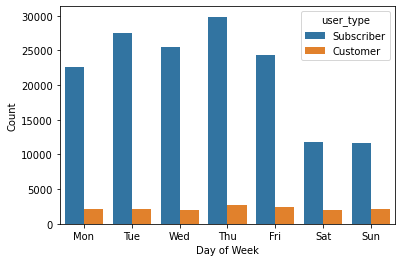

In [351]:
# Visualize the weekly usage by customers and subscribers
sb.countplot(data=df_new, x='start_time_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

> There were more subscriber riders overall when compared to customers. The weekend drop also indicate many of the subscribers commute to work during weekdays.

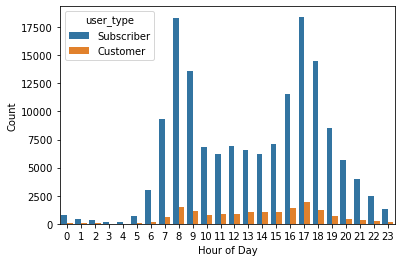

In [352]:
# Visualize the daily usage by customers and subscribers
sb.countplot(data=df_new, x='start_time_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

> Again, the peak at 8am and 5pm corresponds with the work hours during the day. Subscribers most likely rode suring those hours to and from work.

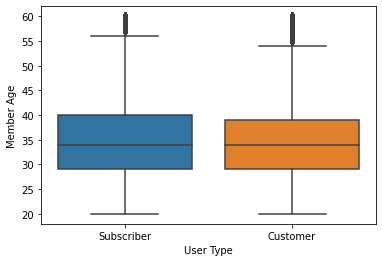

In [353]:
# Visualize the age of customers and subscribers
sb.boxplot(data=df_new, x='user_type', y='member_age');
plt.xlabel('User Type');
plt.ylabel('Member Age');

> Subscribers were slightly older than customers which is understandable since most belonged to the working class that rode to work.

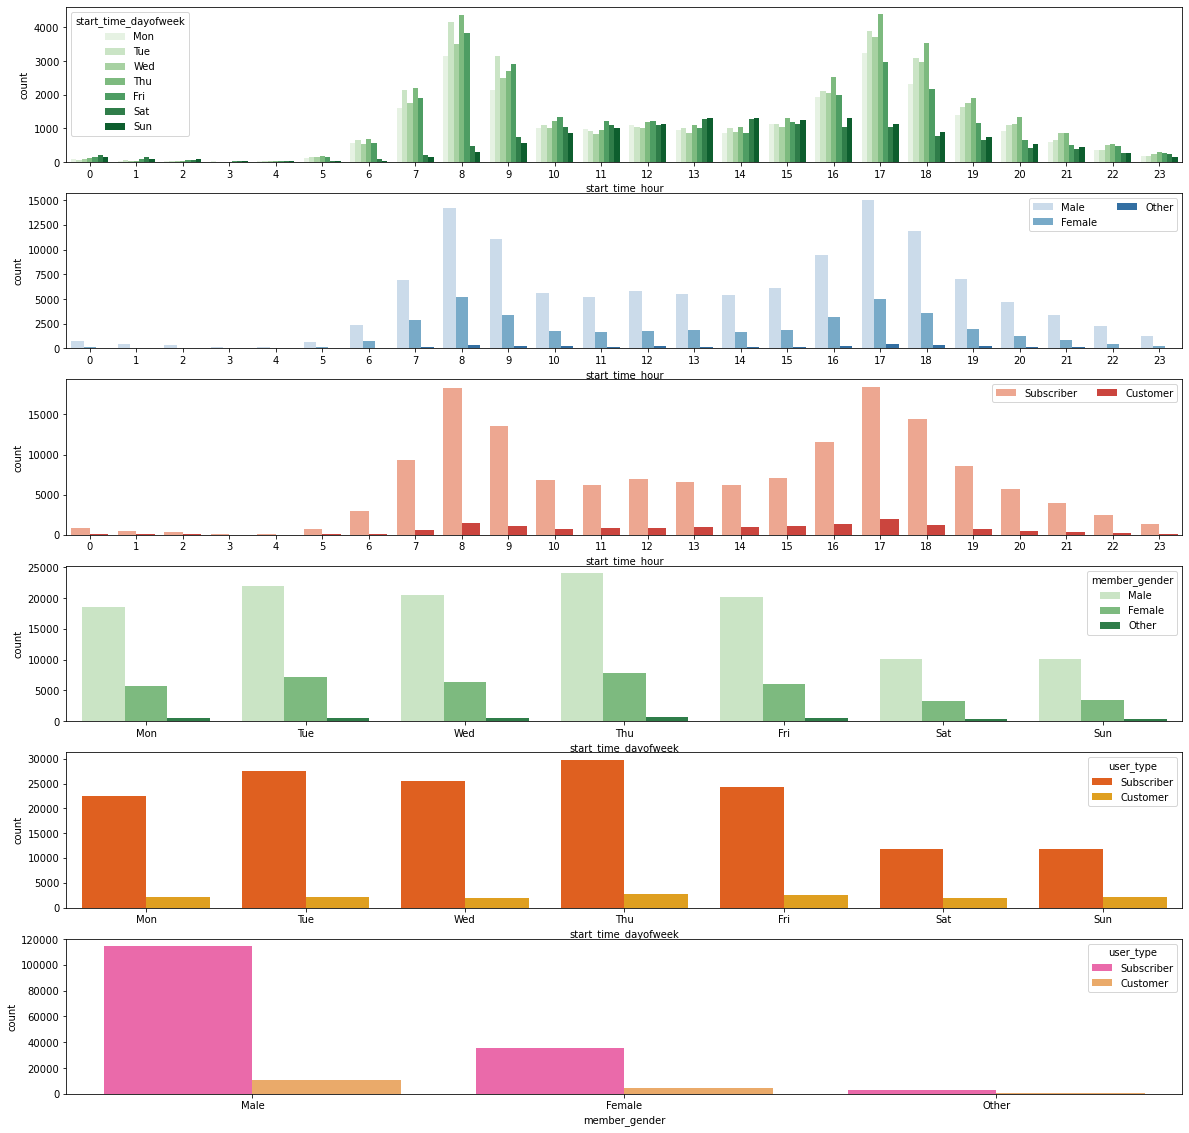

In [354]:
# Visualize all the plots together
plt.figure(figsize = [20, 20]);

plt.subplot(6, 1, 1);
sb.countplot(data = df_new, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Greens');

ax = plt.subplot(6, 1, 2);
sb.countplot(data = df_new, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping

ax = plt.subplot(6, 1, 3);
sb.countplot(data = df_new, x = 'start_time_hour', hue = 'user_type', palette = 'Reds');
ax.legend(loc = 1, ncol = 2);

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_new, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df_new, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(6, 1, 6);
sb.countplot(data = df_new, x = 'member_gender', hue = 'user_type', palette = 'spring');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> + There are more subscribers compared to customers. 
> + Subscribers used the bikesharing service to commute to work while customers mostly used it for pleasure.
> + Average trip duration on weekends was longer than that of weekdays.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> + It is interesting to note that the average age of subscribers is slightly above that of customers.

## Multivariate Exploration

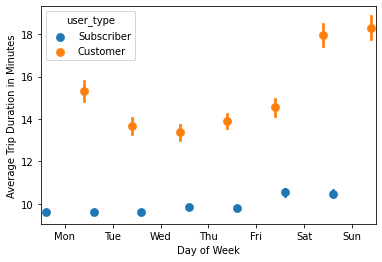

In [355]:
#Visualize the average trip dution during weekdays between subscribers and customers
sb.pointplot(data=df_new, x='start_time_dayofweek', y='duration_min', hue='user_type', dodge=0.8, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Average Trip Duration in Minutes');

> Customers had an overall longer duration of trips during weekdays. However, both subscribers and customers experienced increase in trip duration during weekends.

In [356]:
def histgrid(x, y, **kwargs):
    """ Function for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df_new['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

In [357]:
# Compute the logarithm of duration in minutes to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_new['log_duration_min'] = df_new['duration_min'].apply(log_trans)

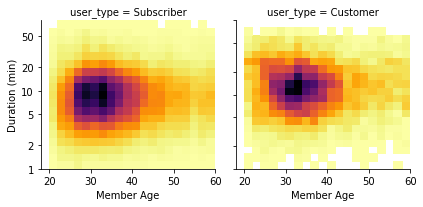

In [358]:
# Plot the duration of customers and subscribers
g = sb.FacetGrid(data = df_new, col = 'user_type', height = 3);
g.map(histgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

> As expected, customers biked for longer duration than subscribers.

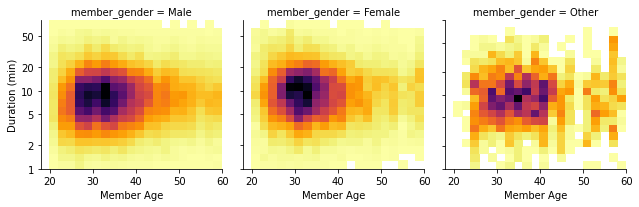

In [359]:
# Plot the duration of customers and subscribers
g = sb.FacetGrid(data = df_new, col = 'member_gender', height = 3);
g.map(histgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

> Female bikers biked longer than their male counterparts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the multivariate exploration strengthened some of the patterns we have observed in the univariate and bivariate exploration. The longer trips during weekends and longer trips during weekdays indicate the use of bikesharing services majorly for commuting to work by subscribers. 

### Were there any interesting or surprising interactions between features?

> There is nothing suprising from the multavariate exploration as the features complemented each other and earlier findings in the previous explorations.